<a href="https://colab.research.google.com/github/Onyinnye/Customer-Segmentation-using-K-Means-Clustering/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing dependencies**

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

**Data collection and Analysis**

In [2]:
#Loading the data from csv file to a pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
#Printing the first 5 rows of the DataFrame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# Getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Choosing the annual income column and the spending score column**

In [7]:
X = customer_data.iloc[:, 3:].values

In [11]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Choosing the number of clusters**

WCSS -> Within Clusters Sum of Squares

In [8]:
# Finding WCSS value for different number of clusters
ks = range(1,11)
wcss = []
for k in ks:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

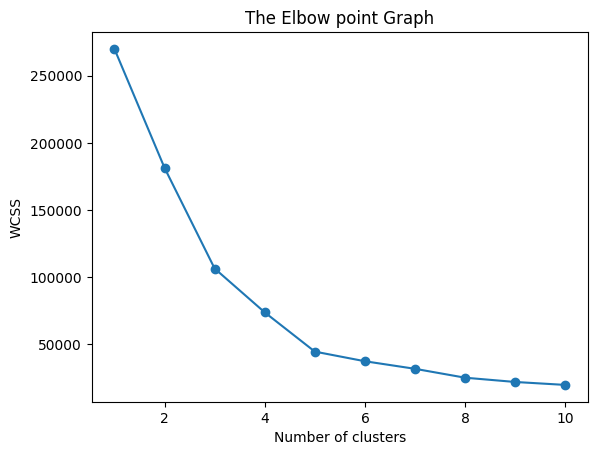

In [10]:
plt.plot(ks, wcss, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow point Graph')
plt.show()

The optimum number of clusters will be 5

Training the K-Means Clustering Model

In [11]:
kmeans = KMeans(n_clusters= 5)
scaler = StandardScaler()

In [13]:
#pipeline = make_pipeline(scaler, kmeans)

In [14]:
y = kmeans.fit_predict(X)

Visualizing the clusters

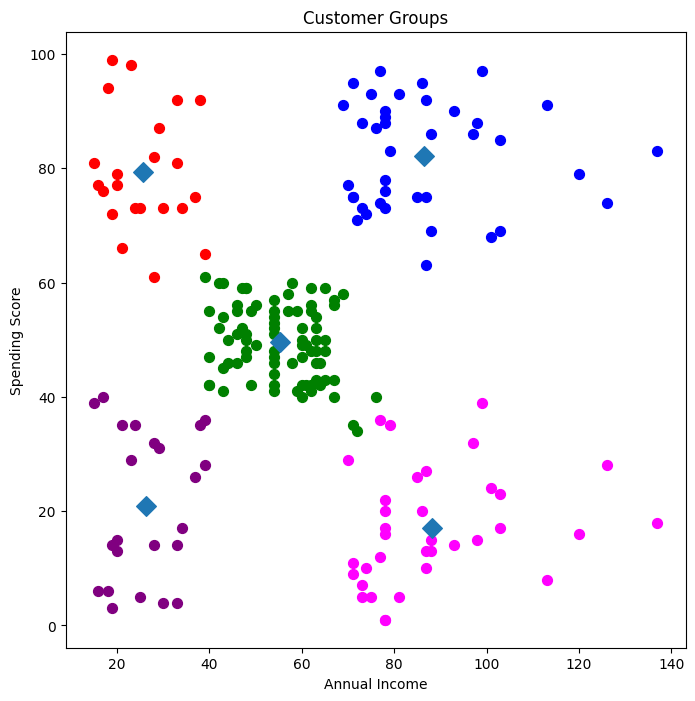

In [15]:
#ploting the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1],s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1],s=50, c='magenta', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1],s=50, c='red', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1],s=50, c='blue', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1],s=50, c='purple', label='Cluster 5')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker= 'D', label ='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
